In [1]:
# Setup
import random
import numpy as np
import matplotlib.pyplot as plt

# Make matplotlib figures appear inline in the notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
%cd src/mnist
import nn

/Volumes/GoogleDrive/My Drive/CS229/ps4/src/mnist


In [3]:
print(nn.softmax(np.array([[10000, 10010, 10], [10000, 10010, 10], [10000, 10010, 10]])))
print(nn.sigmoid(np.array([[10000, 10010, 10], [10000, 10010, 10], [10000, 10010, 10]])))

[[4.53978687e-05 9.99954602e-01 0.00000000e+00]
 [4.53978687e-05 9.99954602e-01 0.00000000e+00]
 [4.53978687e-05 9.99954602e-01 0.00000000e+00]]
[[1.        1.        0.9999546]
 [1.        1.        0.9999546]
 [1.        1.        0.9999546]]


In [4]:
params = nn.get_initial_params(5,2,3)
print(params)

{'W1': array([[ 0.26377884, -0.12837567],
       [ 0.35588017,  0.17443395],
       [ 0.53095744,  0.5904448 ],
       [-0.96556469,  1.01568655],
       [-0.47646806, -0.49122787]]), 'b1': array([0., 0.]), 'W2': array([[ 0.08753577, -0.47496976, -0.50375736],
       [ 0.11325883,  1.48357897,  0.46030929]]), 'b2': array([0., 0., 0.])}


In [5]:
train_data, train_labels = nn.read_data('./images_train.csv', './labels_train.csv')
train_labels = nn.one_hot_labels(train_labels)
p = np.random.permutation(60000)
train_data = train_data[p,:]
train_labels = train_labels[p,:]
print(train_labels)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [6]:
params = nn.get_initial_params(train_data.shape[1], 300, 10)
hidden, output, avgloss = nn.forward_prop(train_data, train_labels, params)

/Volumes/GoogleDrive/My Drive/CS229/ps4/src/mnist/nn.py:52: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))


In [7]:
print(hidden[0], output[0], avgloss)

[1.00000000e+000 0.00000000e+000 9.99999834e-001 1.51436087e-149
 0.00000000e+000 1.00000000e+000 0.00000000e+000 1.00000000e+000
 0.00000000e+000 4.89458918e-192 1.00000000e+000 2.67035700e-212
 1.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 0.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 1.00000000e+000 0.00000000e+000 0.00000000e+000 1.00000000e+000
 3.75828535e-307 0.00000000e+000 2.72161623e-291 1.00000000e+000
 1.00000000e+000 0.00000000e+000 4.57698757e-279 0.00000000e+000
 0.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 1.00000000e+000 1.00000000e+000 0.00000000e+000 1.00000000e+000
 1.00000000e+000 0.00000000e+000 0.00000000e+000 1.00000000e+000
 0.00000000e+000 1.00000000e+000 1.00000000e+000 0.00000000e+000
 0.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 3.26229673e-079 1.00000000e+000 0.00000000e+000 0.00000000e+000
 1.00000000e+000 0.000000

In [8]:
grads = nn.backward_prop(train_data, train_labels, params, nn.forward_prop)

In [9]:
print(grads)

{'W1': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'b1': array([14999.99999779, 14999.9999981 , 14999.99999959, 14999.99999918,
       14999.99999897, 14999.99999897, 14999.99999744, 14999.99999894,
       14999.99999942, 14999.99999923, 14999.9999968 , 14999.99999688,
       14999.99999833, 14999.99999721, 14999.99999884, 14999.99999648,
       14999.99999845, 14999.99999857, 14999.99999952, 14999.99999853,
       14999.9999981 , 14999.99999847, 14999.99999874, 14999.99999931,
       14999.99999849, 14999.99999688, 14999.99999927, 14999.99999752,
       14999.99999899, 14999.99999832, 14999.99999932, 14999.99999849,
       14999.99999836, 14999.99999927, 14999.99999559, 14999.99999935,
       14999.99999603, 14999.99999141, 14999.99999698, 14999.99999848,
       14999.99999678, 14999.999998

/Volumes/GoogleDrive/My Drive/CS229/ps4/src/mnist
For model baseline, got accuracy: 0.928700
For model regularized, got accuracy: 0.967600


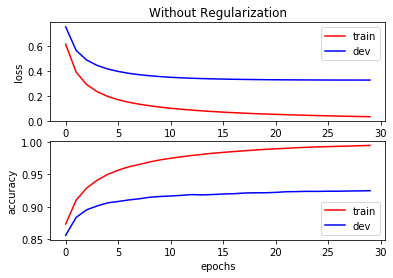

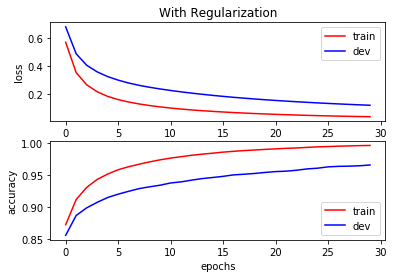

In [1]:
%cd src/mnist
%run -i nn.py

Q5: Reinforcement Learning

In [1]:
%cd src/cartpole

/Volumes/GoogleDrive/My Drive/CS229/ps4/src/cartpole


[INFO] Failure number 1
[INFO] Failure number 2
[INFO] Failure number 3
[INFO] Failure number 4
[INFO] Failure number 5
[INFO] Failure number 6
[INFO] Failure number 7
[INFO] Failure number 8
[INFO] Failure number 9
[INFO] Failure number 10
[INFO] Failure number 11
[INFO] Failure number 12
[INFO] Failure number 13
[INFO] Failure number 14
[INFO] Failure number 15
[INFO] Failure number 16
[INFO] Failure number 17
[INFO] Failure number 18
[INFO] Failure number 19
[INFO] Failure number 20
[INFO] Failure number 21
[INFO] Failure number 22
[INFO] Failure number 23
[INFO] Failure number 24
[INFO] Failure number 25
[INFO] Failure number 26
[INFO] Failure number 27
[INFO] Failure number 28
[INFO] Failure number 29
[INFO] Failure number 30
[INFO] Failure number 31
[INFO] Failure number 32
[INFO] Failure number 33
[INFO] Failure number 34
[INFO] Failure number 35
[INFO] Failure number 36
[INFO] Failure number 37
[INFO] Failure number 38
[INFO] Failure number 39
[INFO] Failure number 40
[INFO] Fa

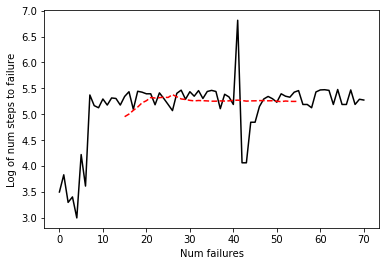

In [2]:
%run cartpole.py